In [43]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
file_path = 'Dataset for People for their Blood Glucose Level with their Superficial body feature reading.xlsx'
df = pd.read_excel(file_path)
df.head(), df.dtypes

(  Unnamed: 0                Unnamed: 1                Unnamed: 2  \
 0        NaN                       NaN                       NaN   
 1        Age  Blood Glucose Level(BGL)  Diastolic Blood Pressure   
 2          9                        79                        73   
 3          9                        80                        73   
 4          9                        70                        76   
 
                 Unnamed: 3  Unnamed: 4        Unnamed: 5 Unnamed: 6  \
 0                      NaN         NaN               NaN        NaN   
 1  Systolic Blood Pressure  Heart Rate  Body Temperature       SPO2   
 2                      118          98         98.300707         99   
 3                      119         102         98.300707         94   
 4                      110          81         98.300707         98   
 
         Unnamed: 7                  Unnamed: 8  
 0              NaN                         NaN  
 1  Shivering (Y/N)  Diabetic/NonDiabetic (D/N)  


In [46]:
df = pd.read_excel(file_path, header=1)
df.drop(index=0, inplace=True)
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [55]:
df.describe

<bound method NDFrame.describe of        Age  Blood Glucose Level (BGL)  Diastolic Blood Pressure  \
1        9                       79.0                      73.0   
2        9                       80.0                      73.0   
3        9                       70.0                      76.0   
4        9                       70.0                      78.0   
5       66                      100.0                      96.0   
...    ...                        ...                       ...   
16965    9                       84.0                      87.0   
16966    9                       83.0                      79.0   
16967    9                       83.0                      82.0   
16968    9                       82.0                      86.0   
16969    9                       77.0                      85.0   

       Systolic Blood Pressure  Heart Rate  Body Temperature  SPO2  \
1                        118.0        98.0         98.300707  99.0   
2                    

In [47]:
column_names = [
    'Age', 'Blood Glucose Level (BGL)', 'Diastolic Blood Pressure',
    'Systolic Blood Pressure', 'Heart Rate', 'Body Temperature', 'SPO2',
    'Shivering (Y/N)', 'Diabetic/NonDiabetic (D/N)'
]
df.columns = column_names

# Convert columns to appropriate data types
df = df.astype({
    'Age': 'int',
    'Blood Glucose Level (BGL)': 'float',
    'Diastolic Blood Pressure': 'float',
    'Systolic Blood Pressure': 'float',
    'Heart Rate': 'float',
    'Body Temperature': 'float',
    'SPO2': 'float',
    'Shivering (Y/N)': 'int',
    'Diabetic/NonDiabetic (D/N)': 'category'
})

df.head(), df.dtypes

(   Age  Blood Glucose Level (BGL)  Diastolic Blood Pressure  \
 1    9                       79.0                      73.0   
 2    9                       80.0                      73.0   
 3    9                       70.0                      76.0   
 4    9                       70.0                      78.0   
 5   66                      100.0                      96.0   
 
    Systolic Blood Pressure  Heart Rate  Body Temperature  SPO2  \
 1                    118.0        98.0         98.300707  99.0   
 2                    119.0       102.0         98.300707  94.0   
 3                    110.0        81.0         98.300707  98.0   
 4                    115.0        96.0         98.300707  96.0   
 5                    144.0        92.0         97.807052  98.0   
 
    Shivering (Y/N) Diabetic/NonDiabetic (D/N)  
 1                0                          N  
 2                0                          N  
 3                0                          N  
 4            

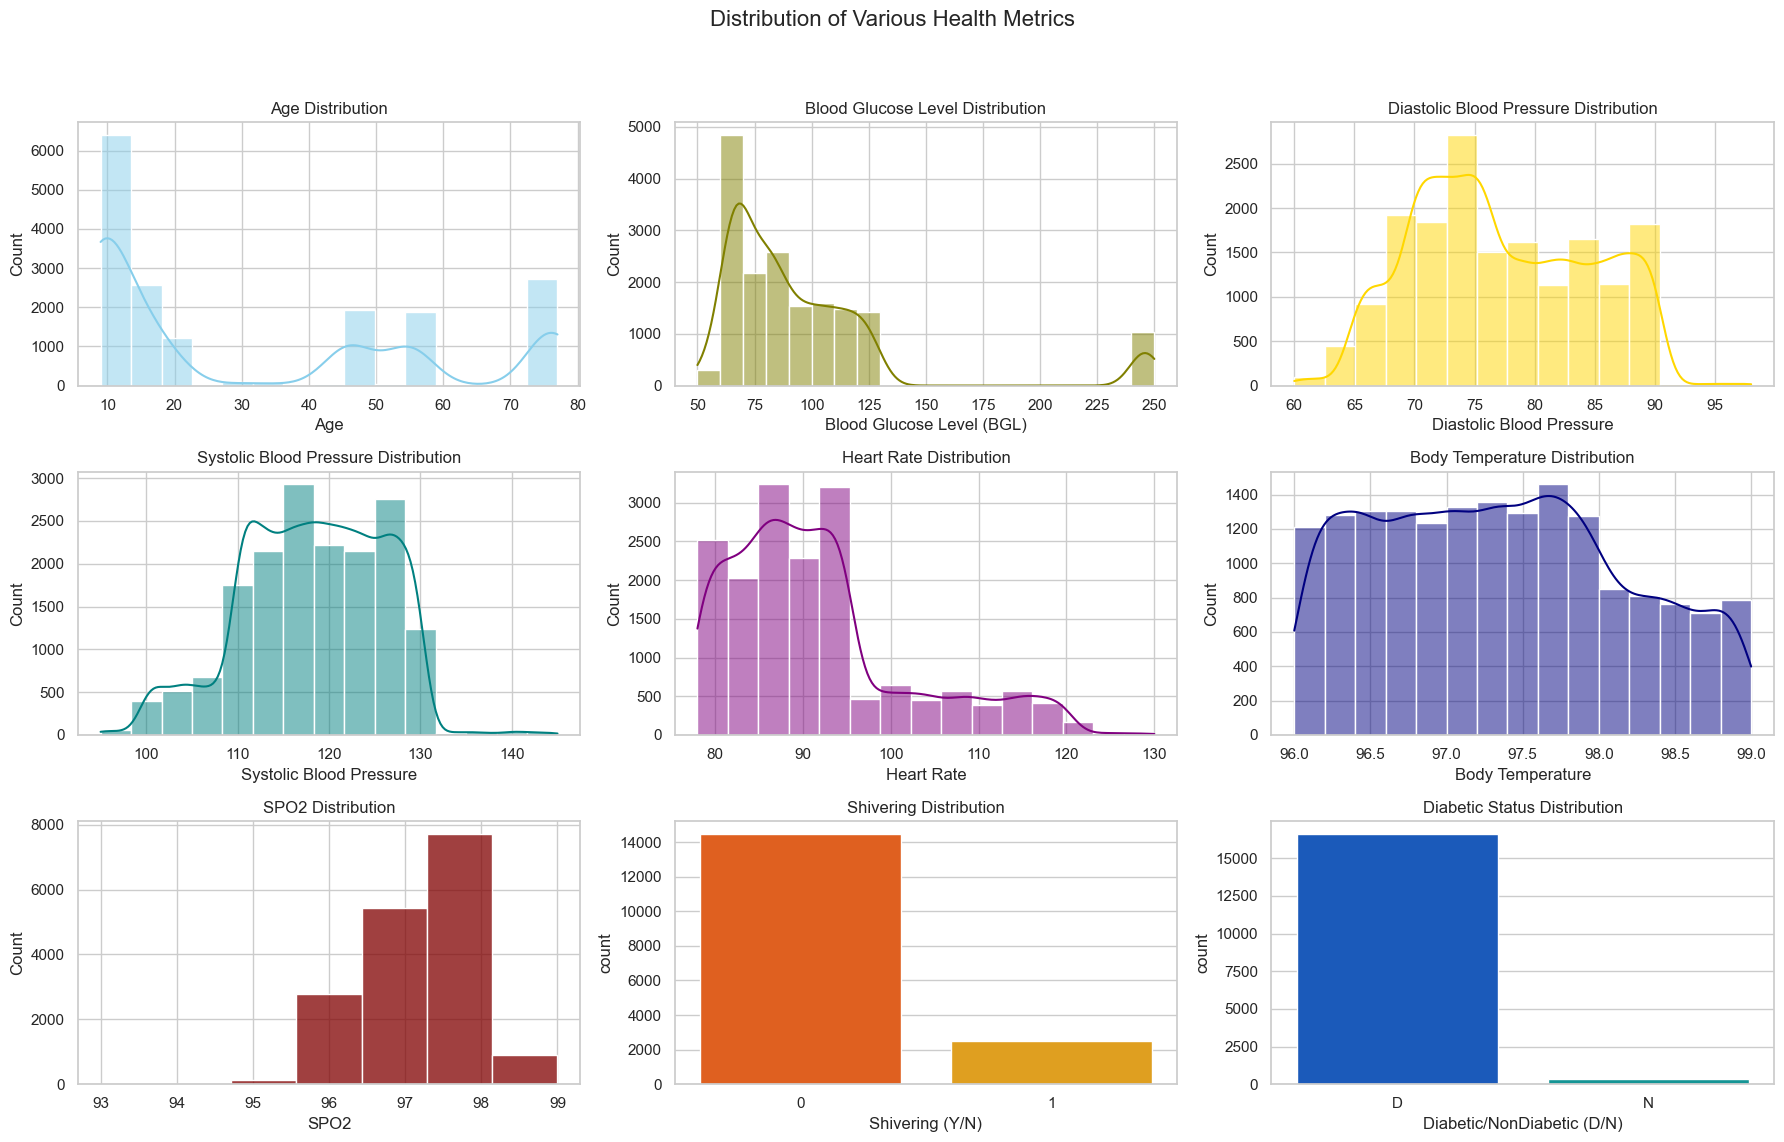

In [48]:
sns.set(style="whitegrid")

# Creating subplots for histograms
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle('Distribution of Various Health Metrics', fontsize=16)

# Plotting each variable
sns.histplot(df['Age'], bins=15, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['Blood Glucose Level (BGL)'], bins=20, kde=True, ax=axes[0, 1], color='olive')
axes[0, 1].set_title('Blood Glucose Level Distribution')

sns.histplot(df['Diastolic Blood Pressure'], bins=15, kde=True, ax=axes[0, 2], color='gold')
axes[0, 2].set_title('Diastolic Blood Pressure Distribution')

sns.histplot(df['Systolic Blood Pressure'], bins=15, kde=True, ax=axes[1, 0], color='teal')
axes[1, 0].set_title('Systolic Blood Pressure Distribution')

sns.histplot(df['Heart Rate'], bins=15, kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Heart Rate Distribution')

sns.histplot(df['Body Temperature'], bins=15, kde=True, ax=axes[1, 2], color='navy')
axes[1, 2].set_title('Body Temperature Distribution')

sns.histplot(df['SPO2'], bins=7, kde=False, ax=axes[2, 0], color='maroon')
axes[2, 0].set_title('SPO2 Distribution')

sns.countplot(x=df['Shivering (Y/N)'], ax=axes[2, 1], palette='autumn')
axes[2, 1].set_title('Shivering Distribution')

sns.countplot(x=df['Diabetic/NonDiabetic (D/N)'], ax=axes[2, 2], palette='winter')
axes[2, 2].set_title('Diabetic Status Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

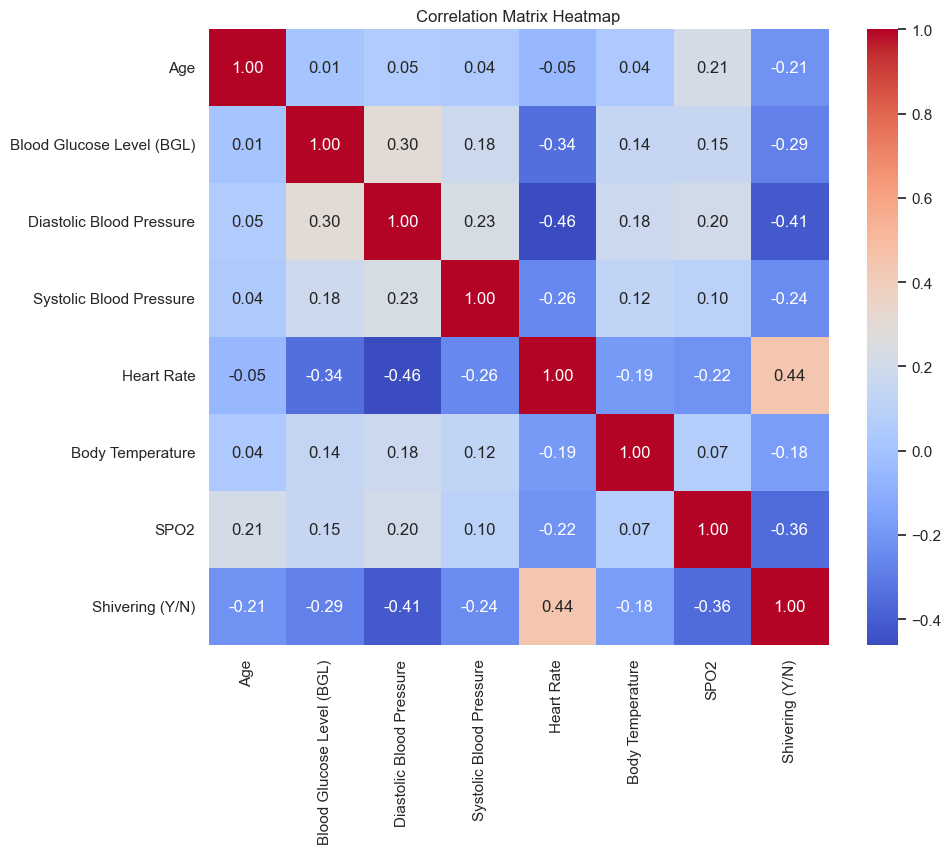

In [49]:
# Correlation matrix and heatmap
correlation_matrix = df.corr(method='pearson', min_periods=1, numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

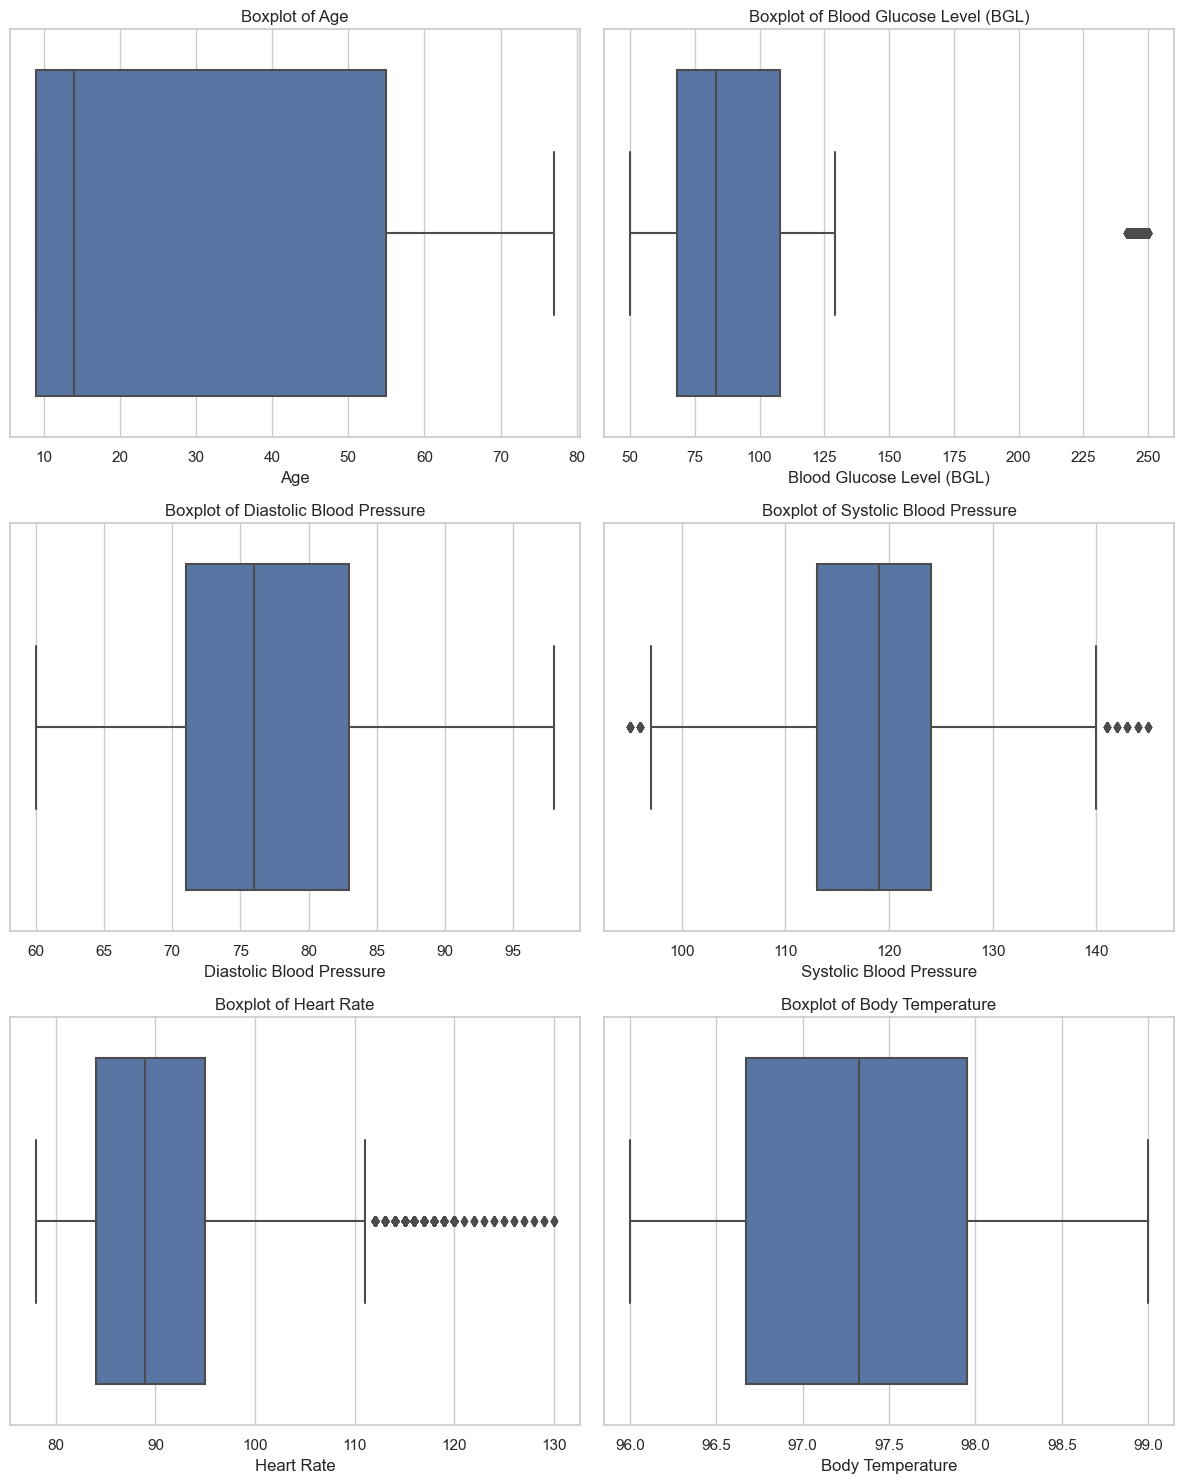

In [56]:
# Creating a boxplot to detect outliers
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))
for ax, column in zip(axes.flatten(), columns_to_plot):
    sns.boxplot(x=df[column], ax=ax)
    ax.set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [51]:
# Function to remove outliers based on the IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers for the specified columns
columns_with_outliers = ['Blood Glucose Level (BGL)', 'Diastolic Blood Pressure',
                         'Systolic Blood Pressure', 'Heart Rate']
cleaned_data = df.copy()

for column in columns_with_outliers:
    cleaned_data = remove_outliers(cleaned_data, column)

# Display the shape of the data before and after outlier removal
df.shape, cleaned_data.shape

((16969, 9), (14605, 9))

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
df['Diabetic/NonDiabetic (D/N)'] = label_encoder.fit_transform(df['Diabetic/NonDiabetic (D/N)'])

# Splitting the dataset into training and testing sets
X= df.drop('Diabetic/NonDiabetic (D/N)', axis=1)  # features
y= df['Diabetic/NonDiabetic (D/N)']  # target

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Calculating accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Get feature importances
feature_importances_rf = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

accuracy_rf, feature_importances_rf

(0.9964643488509134,
                            Importance
 Systolic Blood Pressure      0.295137
 Age                          0.165251
 Diastolic Blood Pressure     0.151510
 Blood Glucose Level (BGL)    0.107404
 SPO2                         0.102348
 Heart Rate                   0.084129
 Body Temperature             0.079426
 Shivering (Y/N)              0.014795)

In [53]:
from sklearn.linear_model import LinearRegression

# Splitting the dataset into training and testing sets for systolic blood pressure prediction
X_systolic = df.drop(['Systolic Blood Pressure', 'Diabetic/NonDiabetic (D/N)'], axis=1)  # features
y_systolic = df['Systolic Blood Pressure']  # target

X_train_systolic, X_test_systolic, y_train_systolic, y_test_systolic = train_test_split(X_systolic, y_systolic, test_size=0.2, random_state=42)

# Initialize the Linear Regression model for systolic blood pressure
lr_systolic = LinearRegression()
lr_systolic.fit(X_train_systolic, y_train_systolic)

# Predictions for systolic blood pressure
y_pred_systolic = lr_systolic.predict(X_test_systolic)

# Splitting the dataset into training and testing sets for diastolic blood pressure prediction
X_diastolic = df.drop(['Diastolic Blood Pressure', 'Diabetic/NonDiabetic (D/N)'], axis=1)  # features
y_diastolic = df['Diastolic Blood Pressure']  # target

X_train_diastolic, X_test_diastolic, y_train_diastolic, y_test_diastolic = train_test_split(X_diastolic, y_diastolic, test_size=0.2, random_state=42)

# Initialize the Linear Regression model for diastolic blood pressure
lr_diastolic = LinearRegression()
lr_diastolic.fit(X_train_diastolic, y_train_diastolic)

# Predictions for diastolic blood pressure
y_pred_diastolic = lr_diastolic.predict(X_test_diastolic)

# Evaluate the performance of the models (you can use metrics like mean squared error, r-squared, etc.)

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate performance for systolic blood pressure prediction
mae_systolic = mean_absolute_error(y_test_systolic, y_pred_systolic)
mse_systolic = mean_squared_error(y_test_systolic, y_pred_systolic)
rmse_systolic = np.sqrt(mse_systolic)
r2_systolic = r2_score(y_test_systolic, y_pred_systolic)

# Evaluate performance for diastolic blood pressure prediction
mae_diastolic = mean_absolute_error(y_test_diastolic, y_pred_diastolic)
mse_diastolic = mean_squared_error(y_test_diastolic, y_pred_diastolic)
rmse_diastolic = np.sqrt(mse_diastolic)
r2_diastolic = r2_score(y_test_diastolic, y_pred_diastolic)

# Print the evaluation metrics
print("Performance Metrics for Systolic Blood Pressure Prediction:")
print("Mean Absolute Error:", mae_systolic)
print("Mean Squared Error:", mse_systolic)
print("Root Mean Squared Error:", rmse_systolic)
print("R-squared (R²) Coefficient:", r2_systolic)
print("\n")
print("Performance Metrics for Diastolic Blood Pressure Prediction:")
print("Mean Absolute Error:", mae_diastolic)
print("Mean Squared Error:", mse_diastolic)
print("Root Mean Squared Error:", rmse_diastolic)
print("R-squared (R²) Coefficient:", r2_diastolic)

Performance Metrics for Systolic Blood Pressure Prediction:
Mean Absolute Error: 6.1098052075961755
Mean Squared Error: 52.666033081113014
Root Mean Squared Error: 7.2571366999053435
R-squared (R²) Coefficient: 0.08362884661905345


Performance Metrics for Diastolic Blood Pressure Prediction:
Mean Absolute Error: 5.125193229153463
Mean Squared Error: 37.30442844049592
Root Mean Squared Error: 6.107735131822263
R-squared (R²) Coefficient: 0.2855952035017001
